<a href="https://colab.research.google.com/github/siddharthsu/siddharthsu/blob/main/ML%26AI_OCR_Test_V_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U layoutparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.2 MB 694 kB/s 
     |████████████████████████████████| 596 kB 52.6 MB/s 
     |████████████████████████████████| 5.6 MB 37.2 MB/s 
     |████████████████████████████████| 3.1 MB 29.7 MB/s 
     |████████████████████████████████| 139 kB 41.5 MB/s 
     |████████████████████████████████| 4.0 MB 28.8 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.

In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-jikzds26/detectron2_2d70cd7da9e84337b8288b4392dd87c4
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-jikzds26/detectron2_2d70cd7da9e84337b8288b4392dd87c4
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
     |████████████████████████████████| 47 kB 2.1 MB/s 
     |████████████████████████████████| 79 kB 3.9 MB/s 
     |████████████████████████████████| 117 kB 21.3 MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=4846396 sha256=0875a29bc72067db027c962ebb4953b606ca6a3652f7b6549b9d65c6a324fab6
  Stored in directory: /tmp/pip-ephem-wheel-cache-rhk333k5/wheels/87/3f/26/dc45098d34763c9dc05ea3ab35c6dec6e9e8c16ac741efb741
  Created wheel for fvcore: filename=fvcore-0.1.3.post20

In [1]:
!pip install layoutparser[ocr]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 4.1 MB/s 


In [1]:
!git clone https://github.com/Layout-Parser/layout-parser.git


Cloning into 'layout-parser'...
remote: Enumerating objects: 1340, done.
remote: Counting objects: 100% (365/365), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 1340 (delta 319), reused 254 (delta 254), pack-reused 975
Receiving objects: 100% (1340/1340), 62.85 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (732/732), done.


In [2]:
%cd layout-parser/


/content/layout-parser


In [ ]:
import cv2
image = cv2.imread("/content/21ESCV_Abstract%20Book_6.png")
image = image[..., ::-1]

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


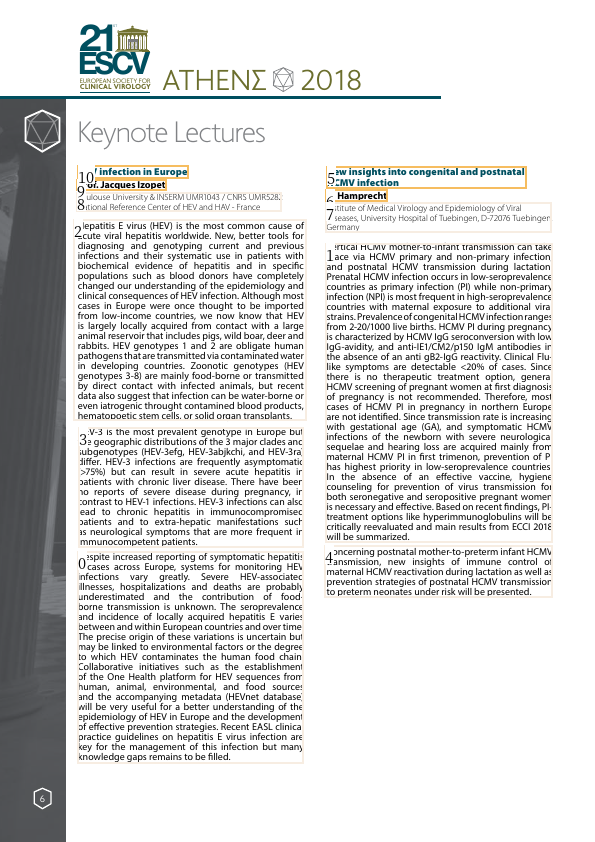

In [ ]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,show_element_id=True)

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=="Title"])
text_blocks


Layout(_blocks=[TextBlock(block=Rectangle(x_1=327.284912109375, y_1=166.050048828125, x_2=525.6974487304688, y_2=188.6457061767578), text=None, id=None, type=Title, parent=None, next=None, score=0.9958600401878357), TextBlock(block=Rectangle(x_1=326.2251281738281, y_1=189.8365936279297, x_2=386.9602966308594, y_2=201.67819213867188), text=None, id=None, type=Title, parent=None, next=None, score=0.9804596900939941), TextBlock(block=Rectangle(x_1=77.51171875, y_1=179.27423095703125, x_2=165.3522491455078, y_2=190.67739868164062), text=None, id=None, type=Title, parent=None, next=None, score=0.9217349886894226), TextBlock(block=Rectangle(x_1=78.31704711914062, y_1=165.6936798095703, x_2=187.17434692382812, y_2=178.3169708251953), text=None, id=None, type=Title, parent=None, next=None, score=0.7076801061630249)], page_data={})

In [ ]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])
figure_blocks

Layout(_blocks=[], page_data={})

In [ ]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [ ]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

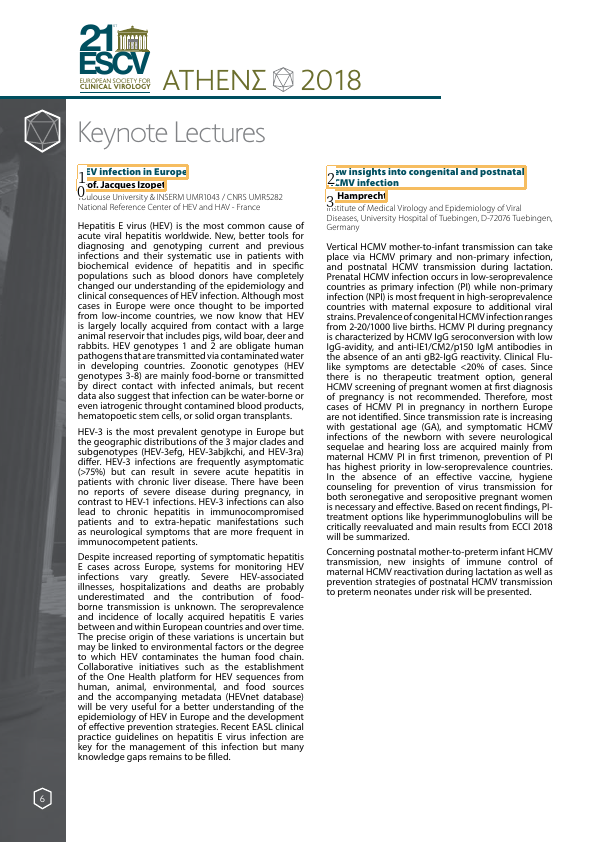

In [ ]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

In [ ]:
ocr_agent = lp.TesseractAgent(languages='eng') 
    # Initialize the tesseract ocr engine. You might need 
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [ ]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (6,139 kB/s)
debconf: unable to initi

In [ ]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [ ]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

Prof. Jacques lzopet

---
HEV infection in Europe

---
‘New insights into congenital and postnatal
HEMY infection

---
K.Hamprecht

---


In [ ]:
text_blocks.get_texts()


['‘Despite increased reporting of symptomatic hepatitis\nE cases actoss Europe, systems for monitoring HEV\nInfections. vary” great Severe. "HeV-ssodated\ninesee hosptalzations and deaths are. probably\nUnderestimated andthe “cantbution of food\n‘ome transmission fs unknown. The seroprevalence\nand incidence of locally acquired hepaits & vais\nBetween and within European courtries and overtime\n‘The precise origin ofthese variations Is uncertaln but\n‘may be linked fo environmental factor othe degree\nfo which HEV contaminates the human food chain,\nColaboratve intativer such ae the establshment\nfof the One Health platform for HEV sequences from\nhuman, animal. environmental and. food. sourees\nSand the accompanying metadata (HEVnet databae8)\n‘al be very useful fora better understanding of the\naldemisiogy of HEV in Europe and the development\nof effective prevention strategies Recent EASL circa\npractice guidelines on hepathisE virus infection are\nKey fr the management of this infe

In [ ]:
for block in text_blocks:
  print(block)

TextBlock(block=Rectangle(x_1=78.14978790283203, y_1=551.5067138671875, x_2=302.2207946777344, y_2=763.3991088867188), text=‘Despite increased reporting of symptomatic hepatitis
E cases actoss Europe, systems for monitoring HEV
Infections. vary” great Severe. "HeV-ssodated
inesee hosptalzations and deaths are. probably
Underestimated andthe “cantbution of food
‘ome transmission fs unknown. The seroprevalence
and incidence of locally acquired hepaits & vais
Between and within European courtries and overtime
‘The precise origin ofthese variations Is uncertaln but
‘may be linked fo environmental factor othe degree
fo which HEV contaminates the human food chain,
Colaboratve intativer such ae the establshment
fof the One Health platform for HEV sequences from
human, animal. environmental and. food. sourees
Sand the accompanying metadata (HEVnet databae8)
‘al be very useful fora better understanding of the
aldemisiogy of HEV in Europe and the development
of effective prevention strategies Re

In [ ]:
!pip install spacy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 460.3 MB 22 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
!pip install click==7.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
nlp = spacy.load("en_core_web_trf")

In [ ]:
sentence=["".join(txt) for txt in text_blocks.get_texts()]

In [ ]:
doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [2]:
import requests
import layoutparser as lp
import pycocotools

In [3]:
from pycocotools.coco import COCO
import random
import cv2

def load_coco_annotations(annotations ,coco=None):
    """
   Args:
        annotations(List):
            alist of coco annotaions for the current image
        coco(optional,defaults to'False'):
            COCO annotation object instance.If set,this function will
            convert the loaded annotation category ids to category names
            set in COCO.categories
    """
    layout = lp.Layout()

    for ele in annotations:

      x, y, w, h = ele['bbox']

      layout.append(
        lp.TextBlock(
          block = lp.Rectangle(x,y,w+x,h+y),
          type = ele['category_id'] if coco is None else coco.cats[ele['category_id']]['name'],id=ele['id']
        )
      )

      return layout
                        

In [5]:
COCO_ANNO_PATH = '/content/Downloaded/result.json'
COCO_IMG_PATH = '/content/Downloaded'

coco = COCO(COCO_ANNO_PATH)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [6]:
for image_id in random.sample(coco.imgs.keys(),2):
    image_info = coco.imgs[image_id]
    annotations = coco.loadAnns(coco.getAnnIds([image_id]))

    image = cv2.imread(f'{COCO_IMG_PATH}/{image_info["file_name"]}')
    layout = load_coco_annotations(annotations,coco)

    viz = lp.draw_box(image[ ... , ::-1], layout)
    display(viz)

TypeError: ignored

In [7]:
! git clone https://github.com/Layout-Parser/layout-model-training

Cloning into 'layout-model-training'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 29.50 KiB | 774.00 KiB/s, done.
Resolving deltas: 100% (62/62), done.


NameError: ignored